<a href="https://colab.research.google.com/github/hscrown/seoul_pr/blob/main/collaborative_filtering_%EC%97%B0%EC%8A%B5(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관분석(correlation analysis) 협업필터링

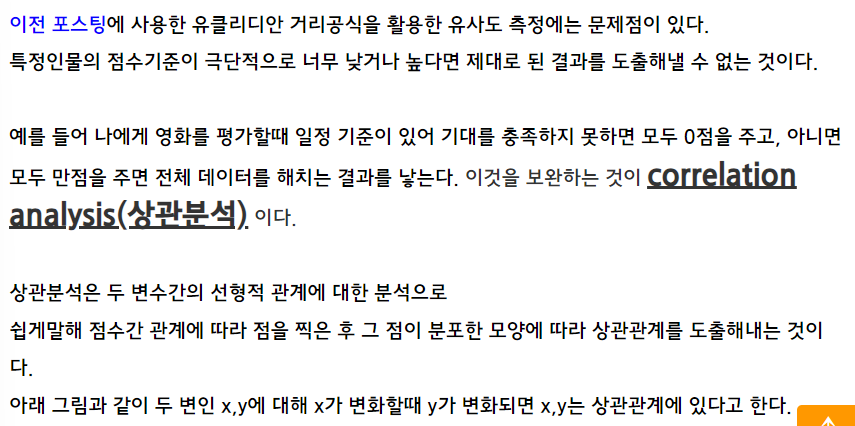

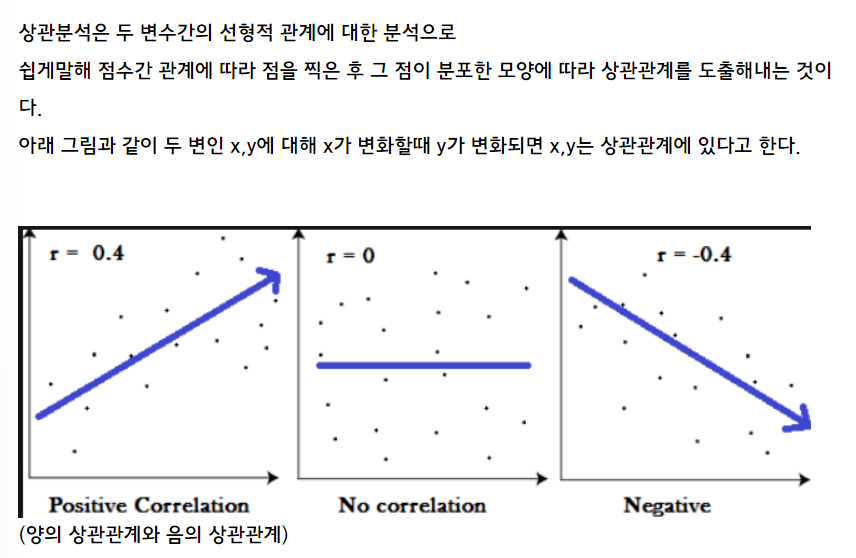

# 데이터 정의



In [1]:
critics = {
    '차현석': {
        '택시운전사': 2.5,
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        'The Night Listener': 3.0,
    },
    '황해도': {
        '택시운전사': 1.0,
        '남한산성': 4.5,
        '킹스맨:골든서클': 0.5,
        '범죄도시': 1.5,
        '아이 캔 스피크': 4.5,
        'The Night Listener': 5.0,
    },
    '김미희': {
        '택시운전사': 3.0,
        '남한산성': 3.5,
        '킹스맨:골든서클': 1.5,
        '범죄도시': 5.0,
        'The Night Listener': 3.0,
        '아이 캔 스피크': 3.5,
    },
    '김준형': {
        '택시운전사': 2.5,
        '남한산성': 3.0,
        '범죄도시': 3.5,
        'The Night Listener': 4.0,
    },
    '이은비': {
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        'The Night Listener': 4.5,
        '범죄도시': 4.0,
        '아이 캔 스피크': 2.5,
    },
    '임명진': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '킹스맨:골든서클': 2.0,
        '범죄도시': 3.0,
        'The Night Listener': 3.5,
        '아이 캔 스피크': 2.0,
    },
    '심수정': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        'The Night Listener': 3.0,
        '범죄도시': 5.0,
        '아이 캔 스피크': 3.5,
    },
    '박병관': {'남한산성': 4.5, '아이 캔 스피크': 1.0,
             '범죄도시': 4.0},
}


# 2. scatter plot 그리기

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

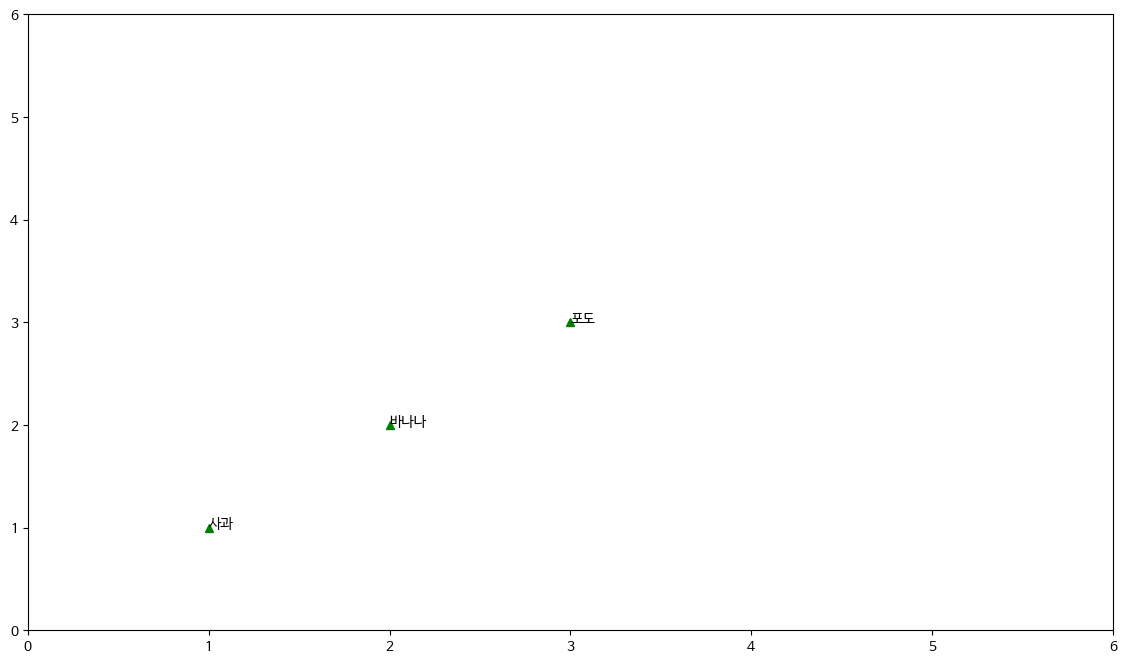

In [4]:
# 산점도 그리기 연습
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^') # 각각의 값과 점 모양
plt.text(1,1,'사과')  # 텍스트찍기
plt.text(2,2,'바나나')  # 텍스트찍기
plt.text(3,3,'포도')  # 텍스트찍기
plt.axis([0,6,0,6]) # x축과 y축의 크기를 설정
plt.show()

In [10]:

# critics data 이용해 scatter plot 그리기
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8)) # plot 크기설정

    # plot 좌표를 위한 list 선언
    li = []
    li2 = []

    for i in critics[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            li.append(critics[name1][i]) # name1의 평점 li[]에 추가
            li2.append(critics[name2][i]) # name2의 평점 li2[]에 추가
            plt.text(critics[name1][i],critics[name2][i],i) # 영화 제목 text 찍기

    plt.plot(li,li2,'ro') #plot그리기

    #각 축의 크기 설정 (0에서 6까지)
    plt.axis([0,6,0,6])

    # x축과 y축 이름 설정
    plt.xlabel(name1)
    plt.ylabel(name2)

    # 그리기
    plt.show()

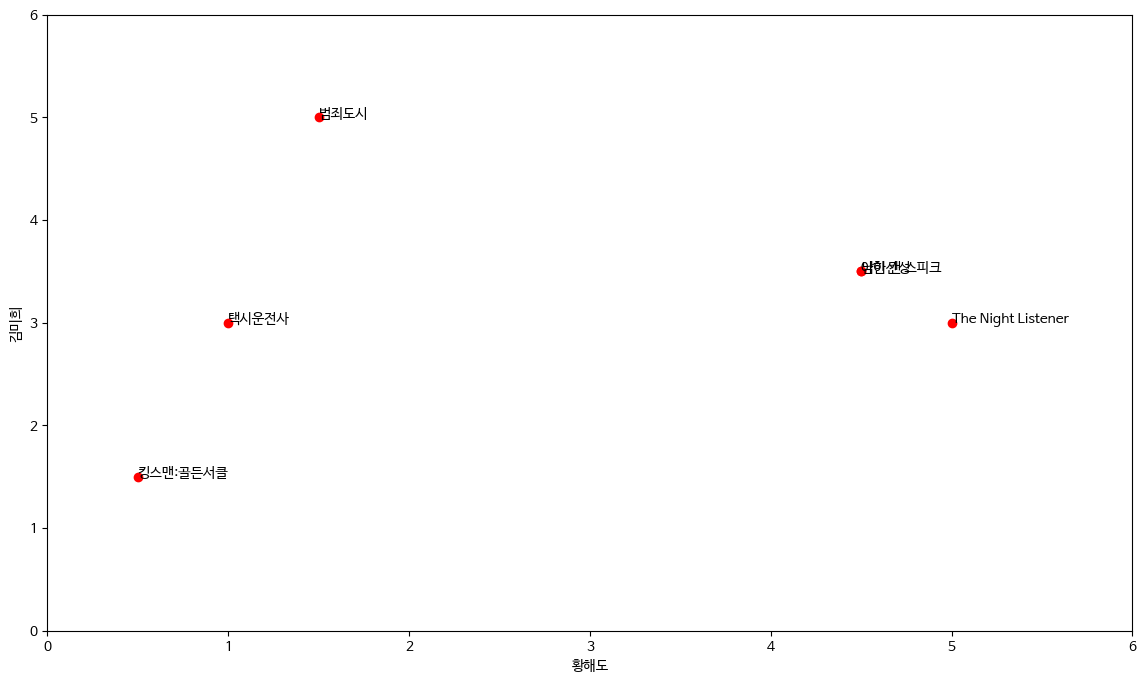

In [11]:
drawGraph(critics, '황해도', '김미희')

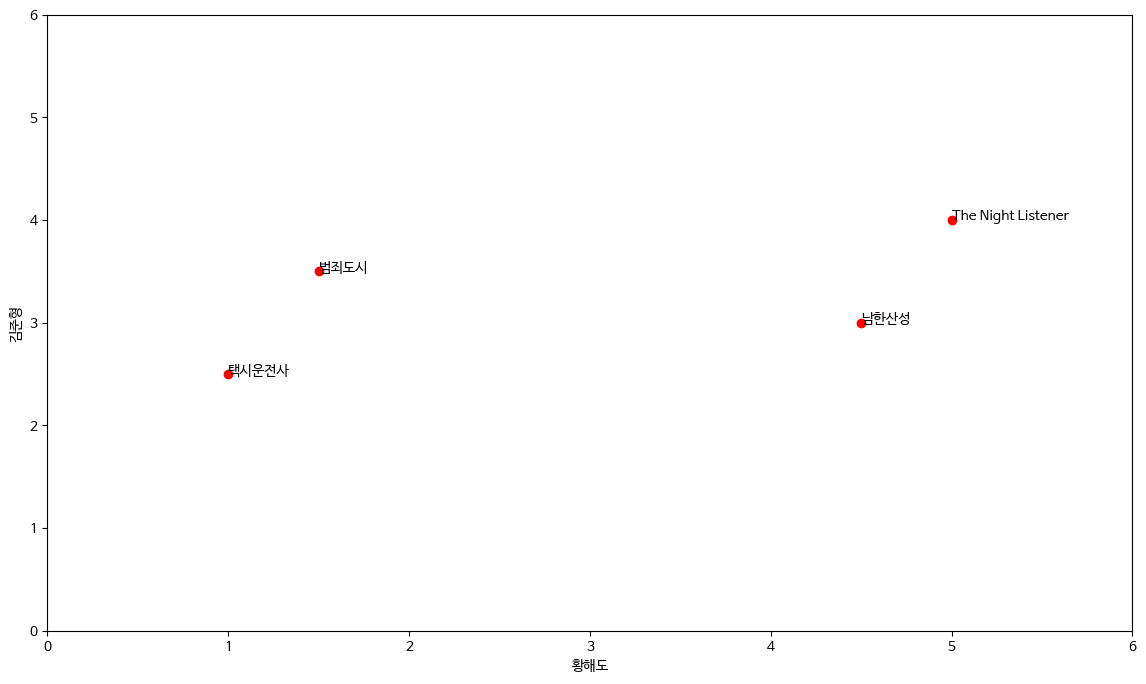

In [12]:
drawGraph(critics, '황해도', '김준형')

# 두 명간 상관계수 구하기

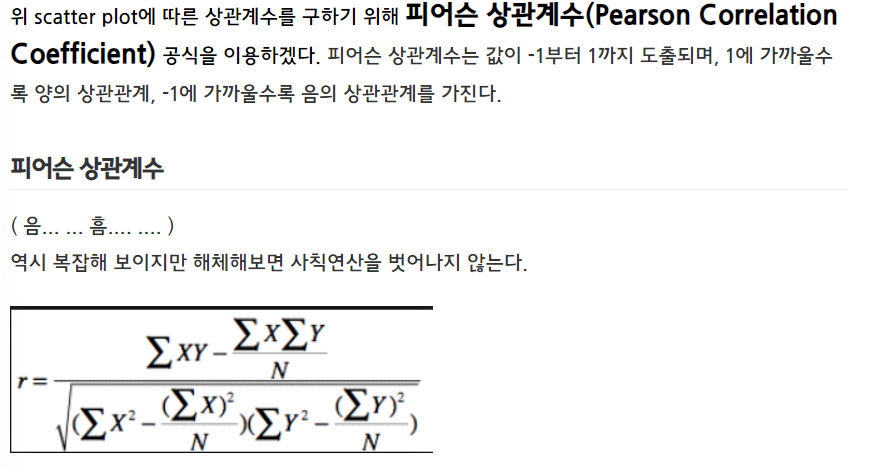

In [18]:
from math import sqrt
# 피어슨 상관계수 구하기
def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수

    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1

    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [19]:
sim_pearson(critics,'황해도','차현석')

0.05477225575051661

# 전체인원과의 상관계수구하기

In [20]:
def top_match(data,name,index=3,sim_function=sim_pearson):
    li=[]
    for i in data: # 딕셔너리를 돌고
        if i!=name: # 자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i))
    li.sort() # 오름차순
    li.reverse() # 내림차순
    return li[:index]

In [21]:
top_match(critics, '박병관',6)

[(0.9912407071619299, '차현석'),
 (0.9244734516419049, '임명진'),
 (0.8934051474415647, '이은비'),
 (0.66284898035987, '심수정'),
 (0.38124642583151164, '김미희'),
 (-0.38124642583151164, '황해도')]

# 실제영화추천하고 예상평점구하기

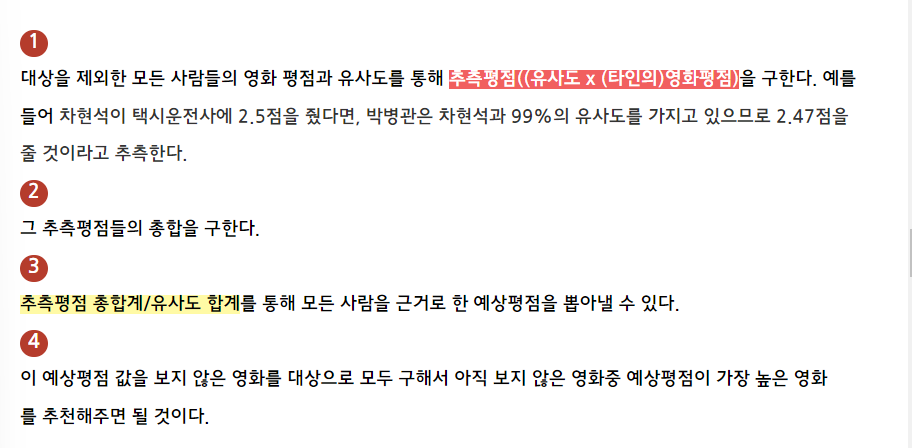

In [22]:
def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(critics, person ,len(data))

    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic

    for sim,name in result: # 튜플이므로 한번에
        if sim<0 : continue #유사도가 양수인 사람만
        for movie in data[name]:
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score+=sim*data[name][movie] # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie]+=score # 합계 구함

                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie,0)
                sim_dic[movie]+=sim

            score=0  #영화가 바뀌었으니 초기화한다

    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li

In [23]:
getRecommendation(critics,'박병관')

[(3.467750847406967, 'The Night Listener'),
 (2.8325499182641614, '택시운전사'),
 (2.5309807037655645, '킹스맨:골든서클')]